# Fake and Real news detection

## Problem statement

Acknowledgements

Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).
Inspiration

Can you use this data set to make an algorithm able to determine if an article is fake news or not ?

## Data

**link** to Kaggle: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

## Project Content

1) Data Importing

2) Exploratory Data Analysis

3) Data Preprocessing via Tf-Idf transformation

4) Random Forest Classifier initialization

5) ROC curve and the best threshold

6) Conclusion

## Data Importing and Preprocessing

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing 2 datasets with both fake and real news
fake = pd.read_csv("/Users/polyanaboss/Downloads/archive/Fake.csv")
true = pd.read_csv("/Users/polyanaboss/Downloads/archive/True.csv")

In [3]:
#looking at the first rows
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#the same for real news
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Assigning the labels for each type of news

Since our data does not have labels **true/fake** news, we will assign them manually.

In [5]:
fake["label"] = 0 # zero if the news are fake
true["label"] = 1 # one of it is real

In [7]:
#concatenating and reshuffling the data
df = pd.concat((fake, true), axis = 0)

In [8]:
#reshuffle
from sklearn.utils import shuffle

df = shuffle(df)

In [11]:
#checking the final dataset
df.head()

,title,text,subject,date,label
5464,Ryan: Trump made right decision to seek Flynn ...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"February 14, 2017",1
22205,"21WIRE.TV Members Newsletter – Feb 18, 2017",In this newsletter we ll include key updates o...,US_News,"February 18, 2017",0
18172,OKLAHOMA Supreme Court Rules Punishing Smokers...,OKLAHOMA CITY The Oklahoma Supreme Court rul...,left-news,"Aug 10, 2017",0
9064,BROTHER OF HERO COACH Breaks Down Over Tribute...,The hero football coach who threw himself betw...,politics,17-Feb-18,0
76,WATCH: Nicolle Wallace Takes Trump To The Woo...,Donald Trump just got his ass handed to him by...,News,"November 21, 2017",0


In [15]:
#resetting the index
df.reset_index(inplace = True, drop = True)
df.drop("index", axis = 1, inplace = True)
df.head()

,title,text,subject,date,label
0,Ryan: Trump made right decision to seek Flynn ...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"February 14, 2017",1
1,"21WIRE.TV Members Newsletter – Feb 18, 2017",In this newsletter we ll include key updates o...,US_News,"February 18, 2017",0
2,OKLAHOMA Supreme Court Rules Punishing Smokers...,OKLAHOMA CITY The Oklahoma Supreme Court rul...,left-news,"Aug 10, 2017",0
3,BROTHER OF HERO COACH Breaks Down Over Tribute...,The hero football coach who threw himself betw...,politics,17-Feb-18,0
4,WATCH: Nicolle Wallace Takes Trump To The Woo...,Donald Trump just got his ass handed to him by...,News,"November 21, 2017",0


## Exploratory Data Analysis

Now we can move on to the visualization and EDA part to get acquainted with the patterns of the data.

<AxesSubplot:>

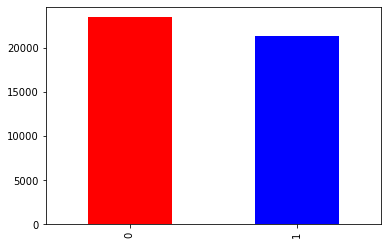

In [28]:
#number of both classes
df["label"].value_counts().plot(kind = "bar", color = ["r", "b"])

The data can be considered as more or less balanced. Hence, no imbalanced data treatment techniques are required.

(array([0, 1]), [Text(0, 0, 'politicsNews'), Text(1, 0, 'worldnews')])

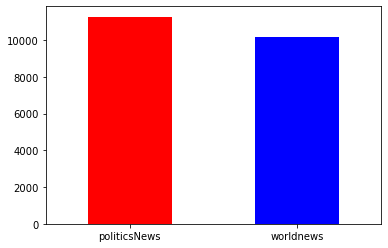

In [33]:
#visualizing the subject of true values
df["subject"][df["label"] == 1].value_counts().plot(kind = "bar", color = ["r", "b"])
plt.xticks(rotation = 0)

<AxesSubplot:>

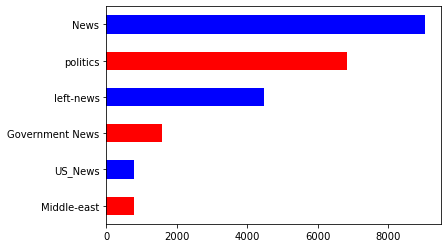

In [38]:
#the same for fake news
df["subject"][df["label"] == 0].value_counts(ascending = True).plot(kind = "barh", color = ["r", "b"])

One can see that there are only 2 subjects of real news with approximately the same number of items in each group(politics news and world news). Meanwhile, there are 6 themes for fake news on the above plot - news, politics, left-news, government news, US news and Middle East ones.

In [44]:
#mean length of title and news
mean_title = []
mean_text = []
for i in range(len(df)):
    mean_title.append(len(df["title"][i]))
    mean_text.append(len(df["text"][i]))
    
print(f"Mean length of news title: {sum(mean_title) / len(mean_title)}\nMean length of text: {sum(mean_text) / len(mean_text)}")


Mean length of news title: 80.11171989843646
Mean length of text: 2469.1096930820972


Obviously, the length of title is extremely small comparing with that of text itself - about 80 characters against ~2469.

There are 2 possible options for building the model: either to predict the reality of news via its title or via its text. Firstly, the title will be used.

In [51]:
#processing the title
from nltk.stem.wordnet import WordNetLemmatizer
import regex as re
corpus=[]
for i in range(len(df)):
    # removing everything except alphabets
    text = re.sub('[^a-zA-Z]',' ', df['title'][i])
    text_words = text.split()
    stem_words = [WordNetLemmatizer().lemmatize(word) for word in text_words]
    text = ' '.join(stem_words)
    corpus.append(text)
    
print(len(corpus))

44898


In [53]:
#assigning cleaned data to dataframe
df["title_cleaned"] = corpus

In [54]:
#splitting on the dependent and independent variables
X = df["title_cleaned"]
y = df["label"]

In [55]:
#splitting on the train test parts
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)

(35918,) (8980,)


In [58]:
#vectorizing the data with TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(lowercase = True, stop_words = "english")

In [59]:
#transforming the data
X_train_vect = tf_vect.fit_transform(X_train)
X_test_vect = tf_vect.transform(X_test)

## Building the model

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier()
rf.fit(X_train_vect, y_train)
pred = rf.predict(X_test_vect)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4588
           1       0.97      0.94      0.96      4392

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



It is seen from the classification report above that Random Forest performs well with the default parameters and there is no need to switch to the text of the news. Now let us move to the ROC curve in order to find the best threshold for binary classification.

In [75]:
#importing the library
import scikitplot as skplt

In [76]:
from scikitplot.metrics import plot_roc_curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

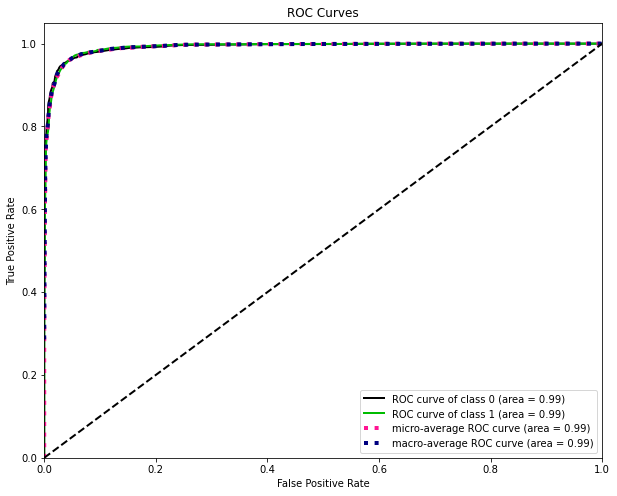

In [82]:
plot_roc_curve(y_test, rf.predict_proba(X_test_vect), figsize = (10, 8))

In [90]:
#finding the best threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test_vect)[:, 1])
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f'Best Threshold = {best_thresh}')

Best Threshold = 0.53


In [93]:
#checking the report under new threhold
print(classification_report(((rf.predict_proba(X_test_vect)[:, 1]) > best_thresh), y_test))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96      4642
        True       0.96      0.95      0.96      4338

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



Well, as the new threshold is only .03 higher than the default value, there is no large difference in the final predictions. Furthermore, the accuracy is still the same - 96% which seems to be pretty good result.

In [102]:
#final predictions
final_prediction = pred
final_prediction[:10]

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# Conclusion

In this short project the model was built to detect whether the US news was fake or real. The dataset was transformed with the help of Tf-Idf transformer. Finally, the Random Forest hsa shown good accuracy of 96% on the validation set. Hence, the aim of predicting the nature of the news can be considered as achieved.